In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('generated_dataset.csv')
data

,username,service_provider_username,service,price,no_of_pages,topic,date,deadline
0,user1,provider1,Website,1525,6,Topic1,2024-01-22,2024-02-02
1,user2,provider2,PPT,200,7,Topic2,2024-02-09,2024-02-14
2,user3,provider3,PPT,200,8,Topic3,2024-02-18,2024-03-02
3,user4,provider4,Website,1525,6,Topic4,2024-02-19,2024-03-01
4,user5,provider5,App,2075,6,Topic5,2024-02-12,2024-02-25
...,...,...,...,...,...,...,...,...
9995,user9996,provider9996,Website,1500,5,Topic9996,2024-01-29,2024-02-08
9996,user9997,provider9997,Website,1500,3,Topic9997,2024-02-08,2024-02-23
9997,user9998,provider9998,Website,1725,6,Topic9998,2024-02-10,2024-02-13
9998,user9999,provider9999,Website,1500,5,Topic9999,2024-02-15,2024-02-28


In [4]:
columns_to_keep = [ 'service', 'price', 'no_of_pages', 'topic','date', 'deadline']
data = data[columns_to_keep].dropna()
data.head()

,service,price,no_of_pages,topic,date,deadline
0,Website,1525,6,Topic1,2024-01-22,2024-02-02
1,PPT,200,7,Topic2,2024-02-09,2024-02-14
2,PPT,200,8,Topic3,2024-02-18,2024-03-02
3,Website,1525,6,Topic4,2024-02-19,2024-03-01
4,App,2075,6,Topic5,2024-02-12,2024-02-25


In [5]:

y=data['price']
features=['service','no_of_pages','date','deadline']
X=data[features]
X.describe()

,no_of_pages
count,10000.00000
mean,7.78150
std,5.09619
min,1.00000
25%,4.00000
50%,6.00000
75%,10.25000
max,20.00000


In [6]:

data['date'] = pd.to_datetime(data['date'])
data['deadline'] = pd.to_datetime(data['deadline'])
data['days']=data['deadline']-data['date']


In [7]:
data.drop(['date','deadline'],axis=1,inplace=True)

In [8]:
data['days']=data['days'].dt.days
data.head()

,service,price,no_of_pages,topic,days
0,Website,1525,6,Topic1,11
1,PPT,200,7,Topic2,5
2,PPT,200,8,Topic3,13
3,Website,1525,6,Topic4,11
4,App,2075,6,Topic5,13


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['service']=label_encoder.fit_transform(data['service'])
data

#0-App
#1-Docs
#3-Website
#2-PPT


,service,price,no_of_pages,topic,days
0,3,1525,6,Topic1,11
1,2,200,7,Topic2,5
2,2,200,8,Topic3,13
3,3,1525,6,Topic4,11
4,0,2075,6,Topic5,13
...,...,...,...,...,...
9995,3,1500,5,Topic9996,10
9996,3,1500,3,Topic9997,15
9997,3,1725,6,Topic9998,3
9998,3,1500,5,Topic9999,13


In [10]:
data['service'].unique()

array([3, 2, 0, 1])

In [11]:
pearsoncorr = data.corr(method='pearson')
pearsoncorr

C:\Users\Raghav\AppData\Local\Temp\ipykernel_20376\1932424350.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearsoncorr = data.corr(method='pearson')


,service,price,no_of_pages,days
service,1.000000,-0.227223,-0.000025,-0.003145
price,-0.227223,1.000000,-0.456603,-0.086987
no_of_pages,-0.000025,-0.456603,1.000000,0.017977
days,-0.003145,-0.086987,0.017977,1.000000


<Axes: >

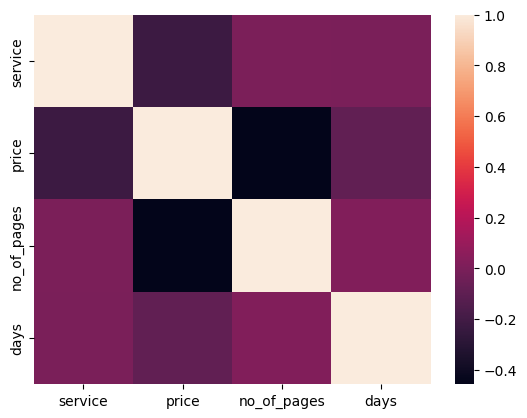

In [12]:
import seaborn as sns
sns.heatmap(pearsoncorr)

In [13]:
from scipy.stats import spearmanr
data['no_of_pages'].corr(data['price'], method='spearman')

-0.21290720280106135

In [14]:
data['service'].corr(data['price'], method='spearman')

-0.24757288489839002

In [15]:
data['days'].corr(data['price'], method='spearman')

-0.15795472978935396

In [16]:
from scipy.stats import kendalltau
corr=data.corr(method='kendall')
corr

C:\Users\Raghav\AppData\Local\Temp\ipykernel_20376\425438171.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr(method='kendall')


,service,price,no_of_pages,days
service,1.000000,-0.080881,0.001588,-0.002357
price,-0.080881,1.000000,-0.102742,-0.125884
no_of_pages,0.001588,-0.102742,1.000000,0.012277
days,-0.002357,-0.125884,0.012277,1.000000


<Axes: >

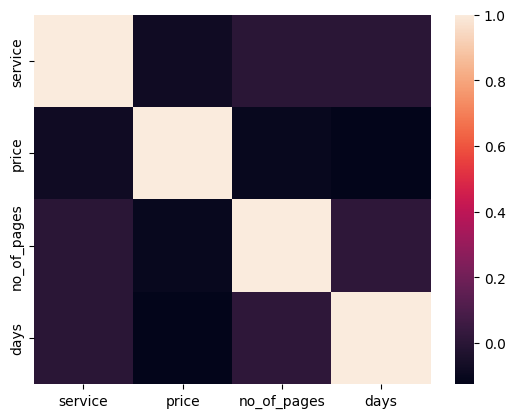

In [17]:
sns.heatmap(corr)

In [18]:
from scipy.stats import chi2_contingency
contingency=pd.crosstab(data['no_of_pages'],data['days'])
c,p,dof,expected=chi2_contingency(contingency)
print(p)

0.41439904876717615


In [19]:
contingency

days,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
no_of_pages,,,,,,,,,,,,,,,
1,12,25,21,14,24,16,20,22,21,17,17,22,12,16,22
2,21,13,9,16,15,14,17,18,21,14,11,16,17,21,24
3,74,89,104,76,69,90,90,102,75,65,95,89,65,91,71
4,81,72,78,84,79,82,82,94,83,95,83,66,96,88,85
5,86,92,84,80,100,76,92,93,73,82,78,81,71,83,89
6,68,82,68,75,95,84,72,84,66,99,89,82,106,84,78
7,77,78,91,79,78,80,77,73,90,84,73,92,78,102,85
8,15,17,14,21,19,15,5,18,10,15,11,11,11,17,14
9,24,13,15,20,17,24,15,13,22,14,24,19,18,23,10
